Решить задачу: классификации

на выборке: синтетической и https://archive.ics.uci.edu/ml/datasets/Breast+Cancer

с использованием моделей: логистической регрессии, нейронной сети, градиентного бустинга

со структурными параметрами: состав признаков, структура модели, количество параметров модели

критерии качества: ROC AUC, PR кривая, сложность модели (ввести опеределение)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

In [2]:
data_synt = load_breast_cancer()
pdata_synt = pd.DataFrame(data_synt["data"], columns = data_synt["feature_names"])
data = pd.read_csv("data/breast-cancer.csv", names = ["class", "age", "menopause", "tumor-size", "inv-nodes", 
                                                      "node-caps", "deg-malig", "breast", "breast-quad", 
                                                      "irradiat"])

In [3]:
X_synt = data_synt['data']
y_synt = data_synt['target']

In [4]:
y = data["class"]
X = data.drop(columns = ["class"])
X

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [5]:
categorical_features = ['menopause', 'node-caps', 'breast-quad', 'irradiat']
ordering_features = ['age', 'tumor-size', 'inv-nodes', 'deg-malig']

In [6]:
pdata_synt

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
print(data_synt.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

## Предобработка данных:

### 1. Обработка категориальных признаков.

Используем два разных способа кодирования категориальных признаков:

### 2. Нормализация данных.

Все признаки у нас категориальные, поэтому нормализация данных как минимум будет бесполезна, а как максимум вредна.


In [8]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse = False)

X_prepro_ohe = encoder.fit_transform(X[categorical_features])
X_prepro_ohe.shape

(286, 14)

In [9]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories = [['10-19', '20-29', 
                                        '30-39', '40-49', '50-59',
                                        '60-69', '70-79', '80-89', '90-99'],
                                       ['0-4', '5-9', '10-14', '15-19', 
                                        '20-24', '25-29', '30-34', '35-39', 
                                        '40-44','45-49', '50-54', '55-59'],
                                       ['0-2', '3-5', '6-8', '9-11', '12-14', 
                                        '15-17', '18-20', '21-23', '24-26',
                                        '27-29', '30-32', '33-35', '36-39'],
                                       [1, 2, 3]])

X_prepro_oe = encoder.fit_transform(X[ordering_features])
X_prepro_oe.shape

(286, 4)

In [10]:
X_prepro_oe

array([[2., 6., 0., 2.],
       [3., 4., 0., 1.],
       [3., 4., 0., 1.],
       ...,
       [5., 4., 0., 0.],
       [3., 6., 1., 2.],
       [4., 6., 1., 2.]])

In [11]:
X_prepro = np.hstack((X_prepro_ohe, X_prepro_oe))

In [12]:
X_prepro

array([[0., 0., 1., ..., 6., 0., 2.],
       [0., 0., 1., ..., 4., 0., 1.],
       [0., 0., 1., ..., 4., 0., 1.],
       ...,
       [1., 0., 0., ..., 4., 0., 0.],
       [1., 0., 0., ..., 6., 1., 2.],
       [1., 0., 0., ..., 6., 1., 2.]])

In [13]:
target = []
for i in range(len(y)):
    if y[i] == "recurrence-events":
        target.append(0)
    else:
        target.append(1)
target = np.array(target)


In [14]:
print(target)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_synt = scaler.fit_transform(X_synt)

Разделим выборку на тренировочную и тестовую 80/20

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prepro, target, test_size=0.33, random_state=42, stratify=target)
X_train_synt, X_test_synt, y_train_synt, y_test_synt = train_test_split(X_synt, y_synt, test_size=0.33, random_state=42)

In [16]:
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1])

Теперь у нас есть тренировочная и тестовая выборки

# Обучение моделей

## 1. Логистическая регрессия

1. ROC-AUC scores:
roc-auc score: 0.5935501066098081
accuracy score: 0.7052631578947368
roc-auc score for synt: 0.9585543357592204
accuracy score: 0.9680851063829787
2. PR curves:


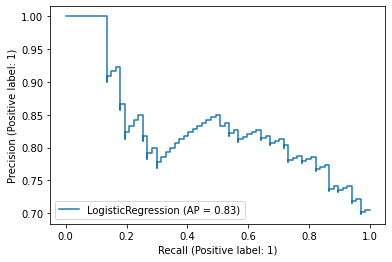

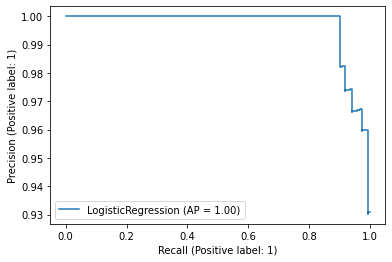

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score as accuracy
import matplotlib.pyplot as plt

log_reg = LogisticRegression(penalty = 'elasticnet', solver = 'saga',l1_ratio = 1, max_iter = 10000)

log_reg.fit(X_train, y_train)
predicted_def = log_reg.predict(X_test)



print("1. ROC-AUC scores:")
print("roc-auc score: {}".format(roc_auc_score(y_test, predicted_def)))
print("accuracy score: {}".format(accuracy(y_test, predicted_def)))

disp = plot_precision_recall_curve(log_reg, X_test, y_test)

log_reg.fit(X_train_synt, y_train_synt)
predicted_synt = log_reg.predict(X_test_synt)

print("roc-auc score for synt: {}".format(roc_auc_score(y_test_synt, predicted_synt)))
print("accuracy score: {}".format(accuracy(y_test_synt, predicted_synt)))
disp = plot_precision_recall_curve(log_reg, X_test_synt, y_test_synt)
print("2. PR curves:")

In [20]:
log_reg.coef_

array([[ 1.28467680e-02,  4.68784668e-03,  6.65460278e-02,
         1.30333530e-02,  0.00000000e+00, -1.00227112e-04,
        -3.53659275e-04,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  5.06206603e-04,
        -9.79801729e-04, -2.13136443e-02,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.33623822e-02,
        -3.56566802e-06,  5.73287978e-02, -2.46982055e-02,
         0.00000000e+00, -9.82075444e-04, -1.38724235e-03,
        -1.89874541e-04, -2.26774222e-06,  0.00000000e+00]])

## 2. Градиентный бустинг

1. ROC-AUC scores:
roc-auc score: 0.6708422174840085
accuracy score: 0.7263157894736842
1. ROC-AUC scores:
roc-auc score for synt: 0.9461576415443445
accuracy score: 0.9521276595744681


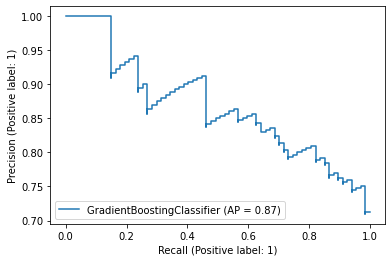

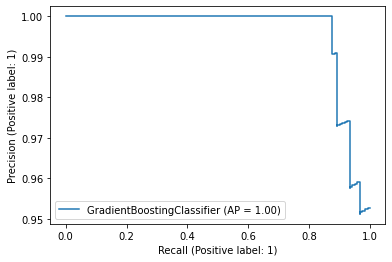

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

GB_clf = GradientBoostingClassifier(
                                    n_estimators = 900,
                                    learning_rate = 0.01,
                                    subsample = 0.9
                                   )

GB_clf.fit(X_train, y_train)
predicted = GB_clf.predict(X_test)
print("1. ROC-AUC scores:")
print("roc-auc score: {}".format(roc_auc_score(y_test, predicted)))
print("accuracy score: {}".format(accuracy(y_test, predicted)))
disp = plot_precision_recall_curve(GB_clf, X_test, y_test)

GB_clf.fit(X_train_synt, y_train_synt)
predicted_synt = GB_clf.predict(X_test_synt)

print("1. ROC-AUC scores:")
print("roc-auc score for synt: {}".format(roc_auc_score(y_test_synt, predicted_synt)))
print("accuracy score: {}".format(accuracy(y_test_synt, predicted_synt)))
disp = plot_precision_recall_curve(GB_clf, X_test_synt, y_test_synt)

In [152]:
roc_auc_scores = []
i_estimators = []
for i in range(100, 3000, 100):
    GB_clf = GradientBoostingClassifier(
                                    n_estimators = i,
                                    learning_rate = 0.01,
                                    subsample = 0.9
                                   )
    GB_clf.fit(X_train, y_train)
    predicted = GB_clf.predict(X_test)
    i_estimators.append(i)
    roc_auc_scores.append(roc_auc_score(y_test, predicted))

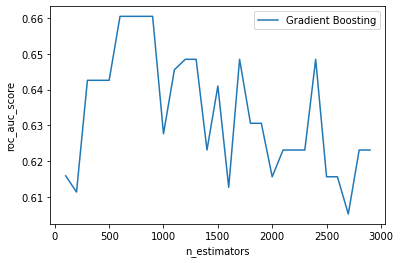

In [153]:
import matplotlib.pyplot as plt

plt.plot(i_estimators, roc_auc_scores)
plt.xlabel("n_estimators")
plt.ylabel("roc_auc_score")
plt.legend(["Gradient Boosting"])
plt.show()

In [42]:
roc_auc_scores = []
i_lr = []
for i in np.arange(0.001, 0.1, 0.001):
    GB_clf = GradientBoostingClassifier(
                                    n_estimators = 900,
                                    learning_rate = i,
                                    subsample = 0.9
                                   )
    GB_clf.fit(X_train, y_train)
    predicted = GB_clf.predict(X_test)
    i_lr.append(i)
    roc_auc_scores.append(roc_auc_score(y_test, predicted))

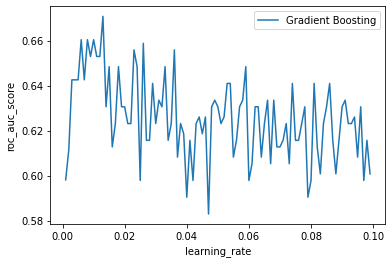

In [149]:
plt.plot(i_lr, roc_auc_scores)
plt.xlabel("learning_rate")
plt.ylabel("roc_auc_score")
plt.legend(["Gradient Boosting"])
plt.show()

## 3. Нейронная сеть 

In [89]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv1D, MaxPool1D
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score as accuracy
import matplotlib.pyplot as plt

In [139]:
epochs = 100

model = Sequential([
    Dense(9, input_shape = (18,)),
    Dense(9, activation="sigmoid"),
    Dense(9),
    Dense(9),
    Dense(9),
    Dense(9),
    Dense(9),
    Dense(1, activation = "sigmoid")
])

In [140]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 9)                 171       
_________________________________________________________________
dense_129 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_130 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_131 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_132 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_133 (Dense)            (None, 9)                 90        
_________________________________________________________________
dense_134 (Dense)            (None, 9)               

In [141]:
model.compile(
    optimizer = 'sgd',
    loss = 'mse',
    metrics = ['AUC']
)

In [142]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
12/12 [==============================] - 1s 3ms/step - loss: 0.2279 - auc: 0.5411
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2545 - auc: 0.4707
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2022 - auc: 0.6346
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2166 - auc: 0.6323
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2402 - auc: 0.5697
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2006 - auc: 0.6386
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2132 - auc: 0.6452
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2159 - auc: 0.6531
Epoch 9/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2081 - auc: 0.6082
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.1992 - auc: 0.6779
Epoch 11/100
12/12 [==============================] - 0s 4m

12/12 [==============================] - 0s 2ms/step - loss: 0.1866 - auc: 0.7049
Epoch 88/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1809 - auc: 0.7118
Epoch 89/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1856 - auc: 0.6674
Epoch 90/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1828 - auc: 0.7226
Epoch 91/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1788 - auc: 0.7752
Epoch 92/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1853 - auc: 0.7536
Epoch 93/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1676 - auc: 0.7638
Epoch 94/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1754 - auc: 0.7510
Epoch 95/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1810 - auc: 0.6860
Epoch 96/100
12/12 [==============================] - 0s 2ms/step - loss: 0.1752 - auc: 0.7063
Epoch 97/100
12/12 [==============================] - 0s 2ms/st

In [144]:
predicted = model.predict(X_test)
predicts = []
for proba in predicted:
    if proba >= 0.5:
        predicts.append(1)
    else:
        predicts.append(0)

print("ROC-AUC score: {}".format(roc_auc_score(y_test, predicted)))
print("Accuracy score: {}".format(accuracy(y_test, predicts)))

ROC-AUC score: 0.7603944562899787
Accuracy score: 0.7368421052631579


In [145]:
precision, recall, thresholds= precision_recall_curve(y_test, predicted)

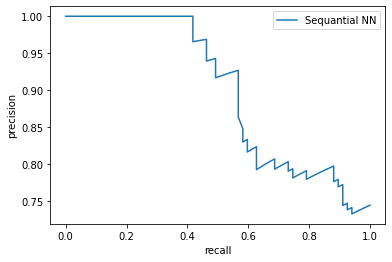

In [148]:
plt.plot(recall, precision)
plt.legend(["Sequantial NN"])
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()

In [98]:
X_train_synt.shape

(381, 30)

In [154]:
epochs = 100

model = Sequential([
    Dense(30, input_shape = (30,)),
    Dense(30, activation="sigmoid"),
    Dense(30),
    Dense(30),
    Dense(30),
    Dense(30),
    Dense(30),
    Dense(1, activation = "sigmoid")
])

In [155]:
model.compile(
    optimizer = 'sgd',
    loss = 'mse',
    metrics = ['AUC']
)

In [156]:
history = model.fit(X_train_synt, y_train_synt, epochs=100, batch_size=16)

Epoch 1/100
24/24 [==============================] - 1s 4ms/step - loss: 0.1799 - auc: 0.9172
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1379 - auc: 0.9639
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 0.1054 - auc: 0.9734
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0923 - auc: 0.9746
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0744 - auc: 0.9751
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0618 - auc: 0.9788
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.0674 - auc: 0.9750
Epoch 8/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0517 - auc: 0.9862
Epoch 9/100
24/24 [==============================] - 0s 4ms/step - loss: 0.0517 - auc: 0.9820
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0519 - auc: 0.9666
Epoch 11/100
24/24 [==============================] - 0s 3m

24/24 [==============================] - 0s 2ms/step - loss: 0.0098 - auc: 0.9982
Epoch 88/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0148 - auc: 0.9944
Epoch 89/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0207 - auc: 0.9869
Epoch 90/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0215 - auc: 0.9897
Epoch 91/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0172 - auc: 0.9957
Epoch 92/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0150 - auc: 0.9912
Epoch 93/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0220 - auc: 0.9886
Epoch 94/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0159 - auc: 0.9960
Epoch 95/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0188 - auc: 0.9942
Epoch 96/100
24/24 [==============================] - 0s 2ms/step - loss: 0.0203 - auc: 0.9883
Epoch 97/100
24/24 [==============================] - 0s 2ms/st

In [157]:
predicted = model.predict(X_test_synt)
predicts = []
for proba in predicted:
    if proba >= 0.5:
        predicts.append(1)
    else:
        predicts.append(0)

print("ROC-AUC score: {}".format(roc_auc_score(y_test_synt, predicted)))
print("Accuracy score: {}".format(accuracy(y_test_synt, predicts)))

ROC-AUC score: 0.9986431478968792
Accuracy score: 0.9893617021276596


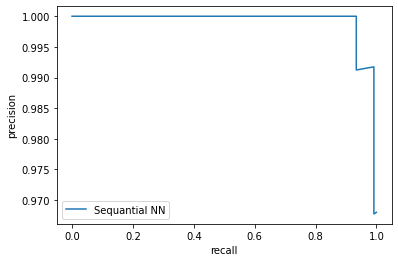

In [158]:
precision, recall, thresholds= precision_recall_curve(y_test_synt, predicted)
plt.plot(recall, precision)
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(["Sequantial NN"])
plt.show()